# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 9: Analiza danych przestrzennych z wykorzystaniem dedykowanych pakietów (część 3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pointpats as pp

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [ ]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    G = 1 - np.exp(-intensity*np.pi*d*d)
    g = pd.DataFrame({"D":d, "G":G})
    return g

def f_function_poisson(d, intensity):
    distances_min = np.sort(np.array(d))
    F = 1 - np.exp(-intensity*np.pi*d*d)
    return pd.DataFrame({"D" : distances_min, "F" : F})

#### UWAGA!
Każde z zadań w tym notatniku będzie wymagało skorzystania z funkcji biblioteki pysal. Ponieważ znaczna część przykładów i dokumentacji modułów wchodzących w skład pakietu pysal dostępna w internecie nie dotyczny ich najnowszych wersji proszę korzystać z dokumentacji wywoływanej bezpośrednio w notatniku pod treścią każdego z zadań.

### Wczytanie danych

Załączone do notatnika pliki zawierają dane niezbędne do wykonania zadań oraz dane wykorzystywane w zawartych w notatniku automatycznych testach. W celu wczytania danych do notatnika umieść pliki w tym samym folderze, w którym znajduje się notatnik.

In [2]:
# Wczytanie danych
kraj = gpd.read_file("Kraj.zip", encoding="utf-8")
points_1 = gpd.read_file("points_1.zip", encoding="utf-8")
points_2 = gpd.read_file("points_2.zip", encoding="utf-8")
points_3 = gpd.read_file("points_3.zip", encoding="utf-8")

test_points = gpd.read_file("test_points.zip", encoding="utf-8")
test_data = gpd.read_file("test_data.zip", encoding="utf-8")

### Zadanie 1: Funkcja G (7 pkt)

#### a) Przygotowanie funkcji
Wykorzystując funkcję `pointpats.distance_statistics.g()` przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów.

Uwagi do wykonania zadania:
 - Funkcja `pointpats.distance_statistics.g()` nie wymaga podania wszystkich parametrów wymienionych w dokumentacji. Do wykonania zadania niezbędne jest wykorzystanie jedynie parametrów `coordinates` i `support`.

In [ ]:
help(pp.distance_statistics.g)

In [ ]:
def g_function(points, intervals):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane w kolumnie "geometry" jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """
    coordinates=pd.DataFrame({"X":points.geometry.x, "Y":points.geometry.y})
    g=pp.distance_statistics.g(coordinates, intervals)
    g=pd.DataFrame({"D":g[0],"G":g[1]})
    return g

In [ ]:
# Komórka testowa
test_results_1 = g_function(test_points, 50)

assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (50, 2)
assert list(test_results_1.columns) == ["D", "G"]
assert np.isclose(test_results_1["D"].min(), 0.0)
assert np.isclose(test_results_1["D"].max(), 14639.02603209451)
assert np.isclose(test_results_1["D"].mean(), 7319.513016047255)
assert np.isclose(test_results_1["G"].min(), 0.0)
assert np.isclose(test_results_1["G"].max(), 1.0)
assert np.isclose(test_results_1["G"].mean(), 0.8209685230024212)

#### b) Wygenerowanie danych i wizualizacja

Wykorzystaj przygotowaną funkcję do wygenerowania danych dla rozkładów punktów `points_1`, `points_2` i `points_3`. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów na tle granic poligonu, w obrębie którego zostały wygenerowane w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. 

Uwagi do wykonania zadania:
- W części zadania dotyczącej generowania teoretycznej funkcji G jednorodnego rozkładu Poissona nie należy pisać kodu od podstaw, a jedynie skorzystać z przygotowanej wcześniej funkcji `g_function_poisson()`, którą można wkleić we wskazanej komórce na początku notatnika.
- Wszystkie z analizowanych rozkładów punktów zostały wygenerowane w obrębie granic Polski. 

<Axes: title={'center': 'Funkcja g points_3'}, xlabel='D', ylabel='G'>

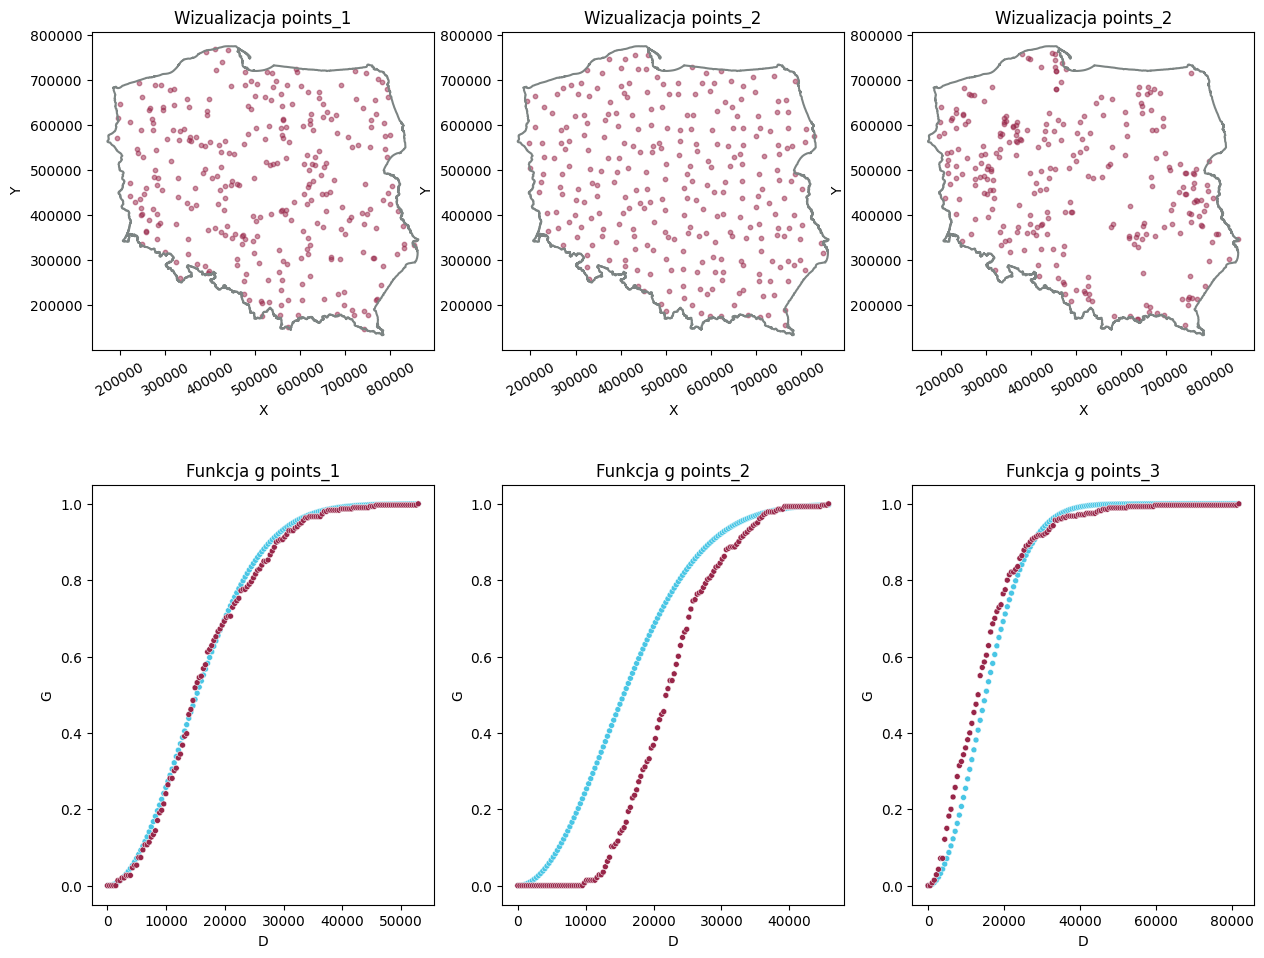

In [ ]:
g_points1 = g_function(points_1, 150)
g_poisson1 = g_function_poisson(g_points1.D,len(points_1)/kraj.geometry.area[0])
g_points2 = g_function(points_2, 150)
g_poisson2 = g_function_poisson(g_points2.D,len(points_2)/kraj.geometry.area[0])
g_points3 = g_function(points_3, 150)
g_poisson3 = g_function_poisson(g_points3.D,len(points_1)/kraj.geometry.area[0])
figure, ax = plt.subplots(2,3,figsize=(15,12))

ax[0,0].set_title("Wizualizacja points_1")
ax[0,0].set_xlabel("X")
ax[0,0].tick_params(axis="x",labelrotation=30)
ax[0,0].set_ylabel("Y")
kraj.boundary.plot(color="#7C8483",ax=ax[0,0],linewidth=1.5)
points_1.plot(color="#982649",ax=ax[0,0],alpha=0.5,markersize=10)

ax[0,1].set_title("Wizualizacja points_2")
ax[0,1].set_xlabel("X")
ax[0,1].tick_params(axis="x",labelrotation=30)
ax[0,1].set_ylabel("Y")
kraj.boundary.plot(color="#7C8483",ax=ax[0,1],linewidth=1.5)
points_2.plot(color="#982649",ax=ax[0,1],alpha=0.5,markersize=10)

ax[0,2].set_title("Wizualizacja points_2")
ax[0,2].set_xlabel("X")
ax[0,2].tick_params(axis="x",labelrotation=30)
ax[0,2].set_ylabel("Y")
kraj.boundary.plot(color="#7C8483",ax=ax[0,2],linewidth=1.5)
points_3.plot(color="#982649",ax=ax[0,2],alpha=0.5,markersize=10)

ax[1,0].set_title("Funkcja g points_1")
sns.scatterplot(data=g_poisson1,x="D", y="G",ax=ax[1,0],color ="#49C6E5",size=10,legend=False)
sns.scatterplot(data=g_points1,x="D", y="G",ax=ax[1,0],color ="#982649",size=10,legend=False)

ax[1,1].set_title("Funkcja g points_2")
sns.scatterplot(data=g_poisson2,x="D", y="G",ax=ax[1,1],color ="#49C6E5",size=10,legend=False)
sns.scatterplot(data=g_points2,x="D", y="G",ax=ax[1,1],color ="#982649",size=10,legend=False)

ax[1,2].set_title("Funkcja g points_3")
sns.scatterplot(data=g_poisson3,x="D", y="G",ax=ax[1,2],color ="#49C6E5",size=10,legend=False)
sns.scatterplot(data=g_points3,x="D", y="G",ax=ax[1,2],color ="#982649",size=10,legend=False)

### Zadanie 2: Funkcja F (7 pkt)

#### a) Przygotowanie funkcji
Wykorzystując funkcję `pointpats.distance_statistics.f()` przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów.

Uwagi do wykonania zadania:
 - Funkcja `pointpats.distance_statistics.f()` nie wymaga podania wszystkich parametrów podanych w dokumentacji. Do wykonania zadania niezbędne jest wykorzystanie jedynie parametrów `coordinates`, `support` i `hull`.

In [ ]:
help(pp.distance_statistics.f)

In [ ]:
def f_function(points, intervals, polygon):
    """
    Parameters
    -------
    points: GeoSeries
        Tablica zawierająca punkty zapisane w kolumnie "geometry" jako obiekty shapely.geometry.point.Point.
    intervals: int
        Liczba dodatnia określająca na ile części ma zostać podzielony dystans do najdalszej odległosci do najbliższego sąsiada.
    polygon: GeoDataFrame
        Pojedynczy wiersz tablicy GeoPandas, zawierający w kolumnie "geometry" poligon, na którym mają zostać wygenerowane punkty.
        
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """
    coordinates = pd.DataFrame({"X" : points.geometry.x, "Y" : points.geometry.y})
    f = pp.distance_statistics.f(coordinates,support = intervals,hull=polygon.geometry[0])
    f = pd.DataFrame({"D" : f[0],"F" : f[1]})
    return f

In [ ]:
# Komórka testowa
test_results_2 = f_function(test_points, 50, test_data)

assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (50, 2)
assert list(test_results_2.columns) == ["D", "F"]
assert np.isclose(test_results_2["D"].min(), 0.0)
assert np.isclose(test_results_2["F"].min(), 0.0)
assert np.isclose(test_results_2["F"].max(), 1.0)

#### b) Wygenerowanie danych i wizualizacja

Wykorzystaj przygotowaną funkcję do wygenerowania danych dla rozkładów punktów `points_1`, `points_2` i `points_3`.

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o odpowiednio dobranej intensywności. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów na tle granic poligonu, w obrębie którego zostały wygenerowane w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. 

Uwagi do wykonania zadania:
- W części zadania dotyczącej generowania teoretycznej funkcji F jednorodnego rozkładu Poissona nie należy pisać kodu od podstaw, a jedynie skorzystać z przygotowanej wcześniej funkcji `f_function_poisson()`, którą można wkleić we wskazanej komórce na początku notatnika. 
- Wszystkie z analizowanych rozkładów punktów zostały wygenerowane w obrębie granic Polski. 

<Axes: title={'center': 'Funkcja f points_3'}, xlabel='D', ylabel='F'>

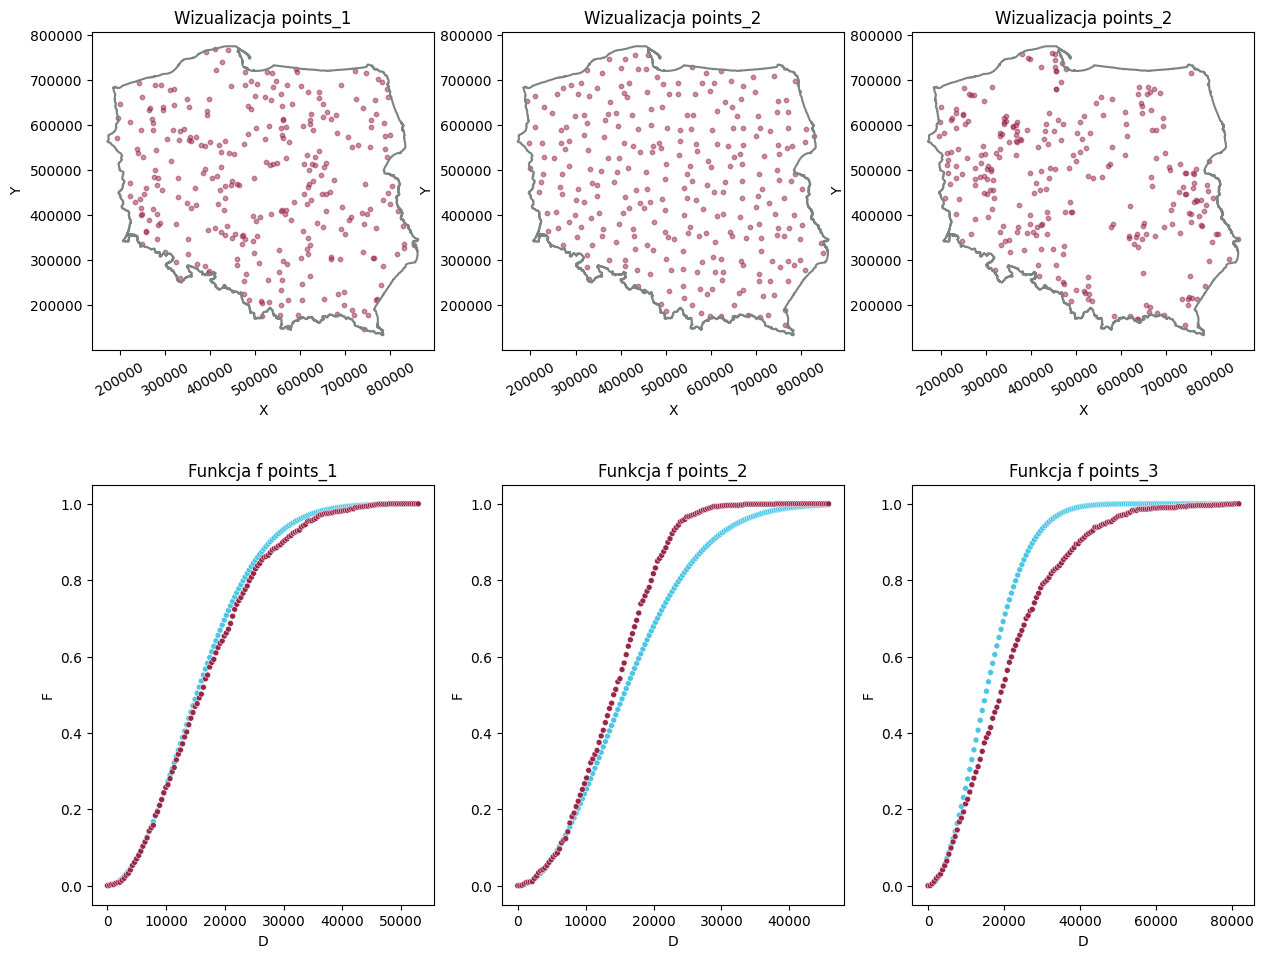

In [ ]:
f_points1 = f_function(points_1, 150,kraj)
f_poisson1 = f_function_poisson(f_points1.D,len(points_1)/kraj.geometry.area[0])
f_points2 = f_function(points_2, 150,kraj)
f_poisson2 = f_function_poisson(f_points2.D,len(points_2)/kraj.geometry.area[0])
f_points3 = f_function(points_3, 150,kraj)
f_poisson3 = f_function_poisson(f_points3.D,len(points_1)/kraj.geometry.area[0])
figure, ax = plt.subplots(2,3,figsize=(15,12))

ax[0,0].set_title("Wizualizacja points_1")
ax[0,0].set_xlabel("X")
ax[0,0].tick_params(axis="x",labelrotation=30)
ax[0,0].set_ylabel("Y")
kraj.boundary.plot(color="#7C8483",ax=ax[0,0],linewidth=1.5)
points_1.plot(color="#982649",ax=ax[0,0],alpha=0.5,markersize=10)

ax[0,1].set_title("Wizualizacja points_2")
ax[0,1].set_xlabel("X")
ax[0,1].tick_params(axis="x",labelrotation=30)
ax[0,1].set_ylabel("Y")
kraj.boundary.plot(color="#7C8483",ax=ax[0,1],linewidth=1.5)
points_2.plot(color="#982649",ax=ax[0,1],alpha=0.5,markersize=10)

ax[0,2].set_title("Wizualizacja points_2")
ax[0,2].set_xlabel("X")
ax[0,2].tick_params(axis="x",labelrotation=30)
ax[0,2].set_ylabel("Y")
kraj.boundary.plot(color="#7C8483",ax=ax[0,2],linewidth=1.5)
points_3.plot(color="#982649",ax=ax[0,2],alpha=0.5,markersize=10)

ax[1,0].set_title("Funkcja f points_1")
sns.scatterplot(data=f_poisson1,x="D", y="F",ax=ax[1,0],color ="#49C6E5",size=10,legend=False)
sns.scatterplot(data=f_points1,x="D", y="F",ax=ax[1,0],color ="#982649",size=10,legend=False)

ax[1,1].set_title("Funkcja f points_2")
sns.scatterplot(data=f_poisson2,x="D", y="F",ax=ax[1,1],color ="#49C6E5",size=10,legend=False)
sns.scatterplot(data=f_points2,x="D", y="F",ax=ax[1,1],color ="#982649",size=10,legend=False)

ax[1,2].set_title("Funkcja f points_3")
sns.scatterplot(data=f_poisson3,x="D", y="F",ax=ax[1,2],color ="#49C6E5",size=10,legend=False)
sns.scatterplot(data=f_points3,x="D", y="F",ax=ax[1,2],color ="#982649",size=10,legend=False)

### Zadanie 3: Analiza Monte-Carlo na przykładzie funkcji G (16 pkt)

#### a) Przygotowanie funkcji

Korzystając z funkcji `pointpats.distance_statistics.g_test()` przygotuj funkcję `g_test_mc()`, która będzie przeprowadzała analizę Monte-Carlo funkcji G testowanego rozkładu punktów oraz przygotowywała dane niezbędne do wizualizacji wyników testu.

Funkcja `pointpats.distance_statistics.g_test()` może zostać wykorzystana do wielokrotnego zasymulowania jednorodnego procesu Poissona o intensywności równej intensywności testowanego procesu i wyliczeniu funkcji G dla każdego z zasymulowanych rozkładów. Funkcje te mogą posłużyć do wykreślenia obwiedni. Jeżeli funkcja G analizowanego rozkładu w całości znajduje się w obwiedni to nie ma podstaw do odrzucenia HO na rzecz H1. W przeciwnym przypadku następuje odrzucenie H0 na rzecz H1. Poziom istotności wykonywanego testu wynosi $\alpha= \frac{2}{n+1}$, gdzie $n$ to liczba wykonywanych symulacji.

Funkcja `g_test_mc()` poza zwracaniem wartości określonych w docstring funkcji powinna również wyświetlać komunikat o wyniku testu zawierający: <br/>
- postać hipotezy zerowej,
- postać hipotezy alternatywnej,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = A".

Przykład komunikatu:
<br/>
`H0: Testowana zmienna ma jednorodny rozkład losowy Poissona` <br/>
`H1: Testowana zmienna nie ma jednorodnego rozkład losowy Poissona` <br/>
`Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.02` <br/>

Uwagi do wykonania zadania:
 - Funkcja `pointpats.distance_statistics.g_test()` nie wymaga podania wszystkich parametrów podanych w dokumentacji. Do wykonania zadania niezbędne jest wykorzystanie jedynie parametrów `coordinates`, `support`, `hull`, `keep_simulations` i `n_simulations`.

In [3]:
help(pp.distance_statistics.g_test)

In [4]:
def g_test_mc(points, intervals, polygon, number_of_simulations):
    points = [[row.geometry.x, row.geometry.y] for index, row in points.iterrows()]
    g_test = pp.distance_statistics.g_test(np.array(points), intervals, hull = polygon.geometry[0], n_simulations = number_of_simulations, keep_simulations = True)
    g_min = [min(array[i] for array in g_test[3]) for i in range(len(g_test[3][0]))]
    g_max = [max(array[i] for array in g_test[3]) for i in range(len(g_test[3][0]))]
    alpha = 2/(number_of_simulations+1)
    
    print("H0: Testowana zmienna ma jednorodny rozkład losowy Poissona")
    print("H1: Testowana zmienna nie ma jednorodnego rozkładu losowego Poissona")

    reject = 0
    for index in range(len(g_test[1])):
        if not(g_min[index] < g_test[1][index] < g_max[index]):
            reject = 1
            print("Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = ", alpha)
            break
    if not(reject):
        print("Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha = ", alpha)
    
    return pd.DataFrame({'D':g_test[0],'G':g_test[1], "G_min":g_min, "G_max":g_max}), alpha, reject

In [5]:
# Komórka testowa
test_results_3 = g_test_mc(test_points, 50, test_data, 19)

assert type(test_results_3[0]) == pd.DataFrame
assert test_results_3[0].shape == (50, 4)
assert list(test_results_3[0].columns) == ["D", "G", "G_min", "G_max"]
assert np.isclose(test_results_3[0]["D"].min(), 0.0)
assert np.isclose(test_results_3[0]["G"].min(), 0.0)
assert np.isclose(test_results_3[0]["G"].max(), 1.0)
assert np.isclose(test_results_3[0]["G_min"].min(), 0.0)
assert np.isclose(test_results_3[0]["G_min"].max(), 1.0)
assert np.isclose(test_results_3[0]["G_max"].min(), 0.0)
assert np.isclose(test_results_3[0]["G_max"].max(), 1.0)
assert np.isclose(test_results_3[1], 0.1)
assert np.isclose(test_results_3[2], 1)

H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkładu losowego Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha =  0.1


#### b) Wygenerowanie danych i wizualizacja

Wykorzystaj przygotowaną funkcję do przetestowania rozkładów punktów `points_1`, `points_2` i `points_3` na poziomie istotności $\alpha=0.05$. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G testowanych rozkładów punktów z zaznaczoną obwiednią wykorzystywaną w teście statystycznym. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów na tle granic poligonu, w obrębie którego zostały wygenerowane w górnym wierszu, a wykresy funkcji G wraz z obwiednią testu w dolnym wierszu figury.

Uwagi do wykonania zadania:
- Wszystkie z analizowanych rozkładów punktów zostały wygenerowane w obrębie granic Polski.

In [6]:
g_test_mc1 = g_test_mc(points_1, 50, kraj, 39)
g_test_mc2 = g_test_mc(points_2, 137, kraj, 39)
g_test_mc3 = g_test_mc(points_3, 137, kraj, 39)

H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkładu losowego Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha =  0.05
H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkładu losowego Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha =  0.05
H0: Testowana zmienna ma jednorodny rozkład losowy Poissona
H1: Testowana zmienna nie ma jednorodnego rozkładu losowego Poissona
Odrzucenie H0 na rzecz H1 na poziomie istotności alpha =  0.05


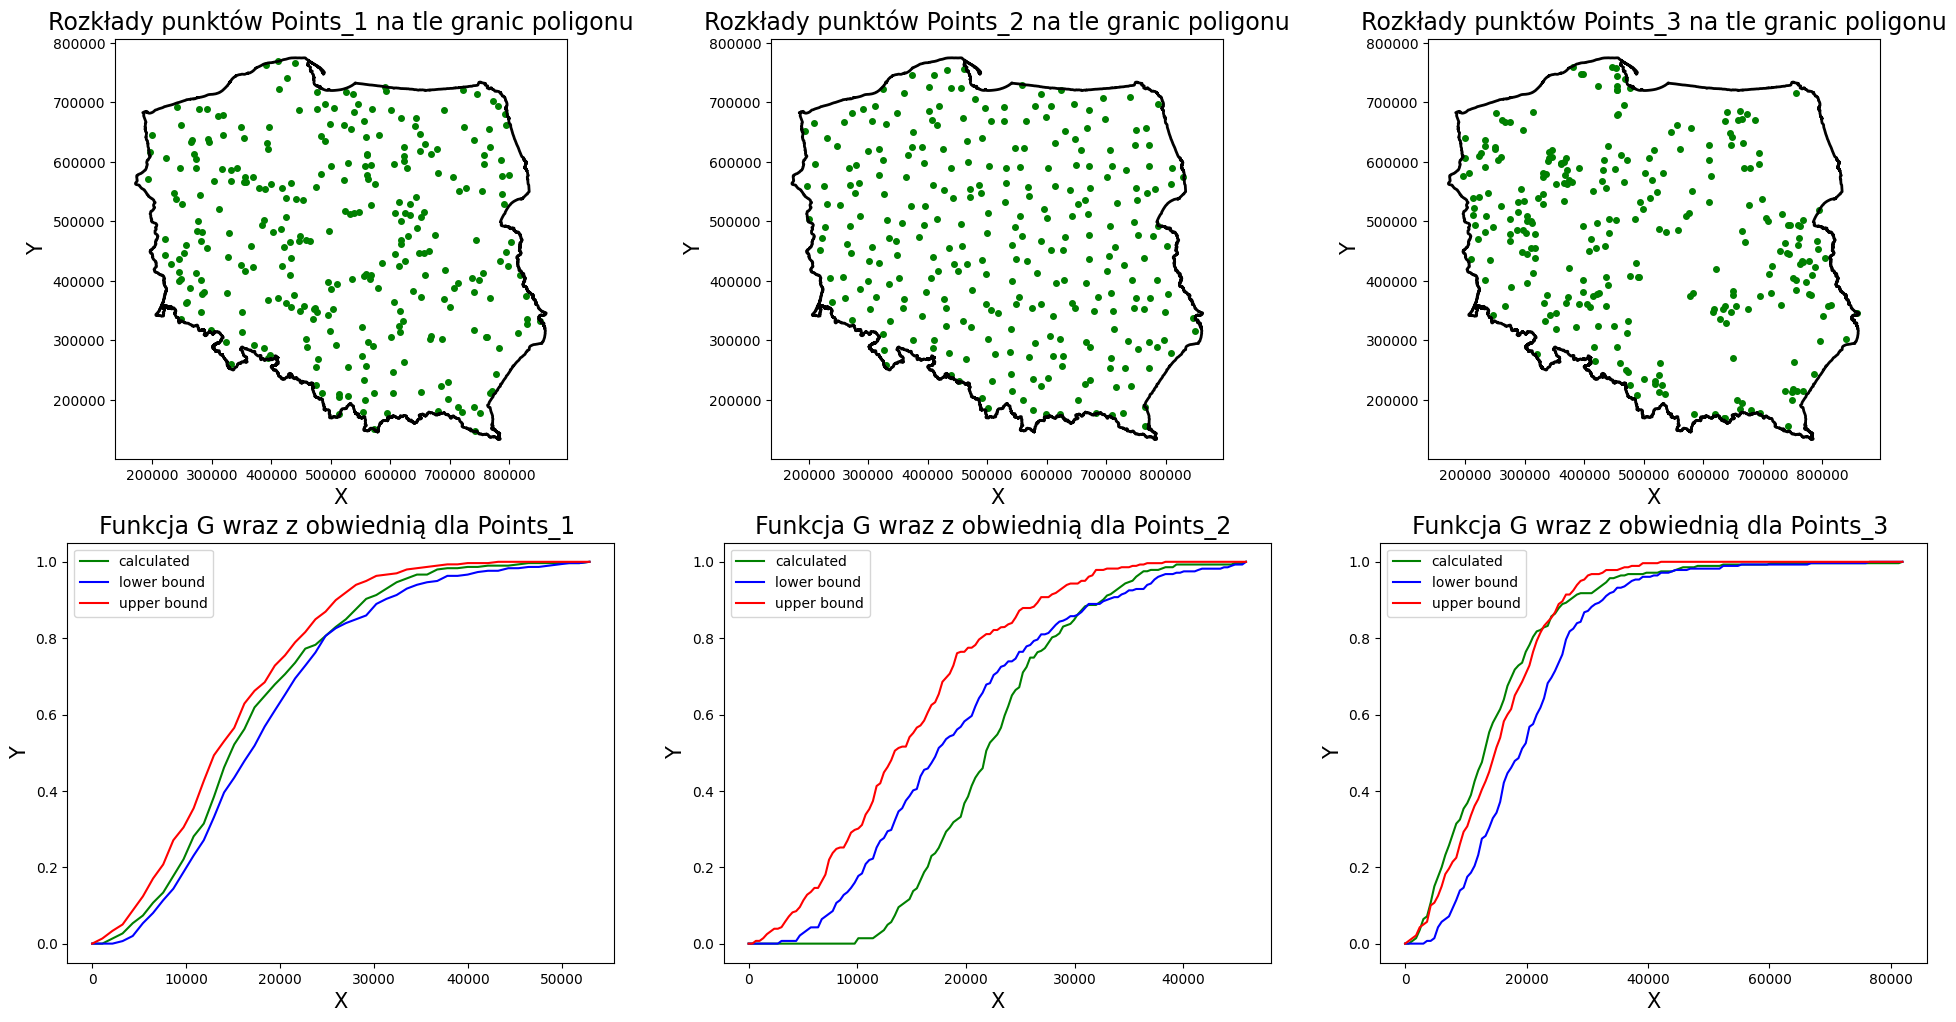

In [64]:
figure, axes = plt.subplots(2,3,figsize=(24,12))
axes[0,0].grid(False)
points_1.plot(ax=axes[0,0], color='green', markersize=16 ,marker='o' )
kraj.boundary.plot(ax=axes[0,0], color='black',linewidth=2)
axes[0,0].set_xlabel("X", size =15)
axes[0,0].set_ylabel("Y", size=15)
axes[0,0].set_title("Rozkłady punktów Points_1 na tle granic poligonu", size=17)

axes[0,1].grid(False)
points_2.plot(ax=axes[0,1], color='green', markersize=16 ,marker='o' )
kraj.boundary.plot(ax=axes[0,1], color='black',linewidth=2)
axes[0,1].set_xlabel("X", size =15)
axes[0,1].set_ylabel("Y", size=15)
axes[0,1].set_title("Rozkłady punktów Points_2 na tle granic poligonu", size=17)

axes[0,2].grid(False)
points_3.plot(ax=axes[0,2], color='green', markersize=16 ,marker='o' )
kraj.boundary.plot(ax=axes[0,2], color='black',linewidth=2)
axes[0,2].set_xlabel("X", size =15)
axes[0,2].set_ylabel("Y", size=15)
axes[0,2].set_title("Rozkłady punktów Points_3 na tle granic poligonu", size=17)

axes[1,0].grid(False)
axes[1,0].plot(g_test_mc1[0]["D"],g_test_mc1[0]["G"], color = 'green')
axes[1,0].plot(g_test_mc1[0]["D"],g_test_mc1[0]["G_min"],color='blue')
axes[1,0].plot(g_test_mc1[0]["D"],g_test_mc1[0]["G_max"],color='red')
axes[1,0].set_xlabel("X", size =15)
axes[1,0].set_ylabel("Y", size=15)
axes[1,0].set_title("Funkcja G wraz z obwiednią dla Points_1 ", size=17)
axes[1,0].legend(['calculated','lower bound','upper bound']) 

axes[1,1].grid(False)
axes[1,1].plot(g_test_mc2[0]["D"],g_test_mc2[0]["G"], color = 'green')
axes[1,1].plot(g_test_mc2[0]["D"],g_test_mc2[0]["G_min"],color='blue')
axes[1,1].plot(g_test_mc2[0]["D"],g_test_mc2[0]["G_max"],color='red')
axes[1,1].set_xlabel("X", size =15)
axes[1,1].set_ylabel("Y", size=15)
axes[1,1].set_title("Funkcja G wraz z obwiednią dla Points_2 ", size=17)
axes[1,1].legend(['calculated','lower bound','upper bound']) 

axes[1,2].grid(False)
axes[1,2].plot(g_test_mc3[0]["D"],g_test_mc3[0]["G"], color = 'green')
axes[1,2].plot(g_test_mc3[0]["D"],g_test_mc3[0]["G_min"],color='blue')
axes[1,2].plot(g_test_mc3[0]["D"],g_test_mc3[0]["G_max"],color='red')
axes[1,2].set_xlabel("X", size =15)
axes[1,2].set_ylabel("Y", size=15)
axes[1,2].set_title("Funkcja G wraz z obwiednią dla Points_3 ", size=17)
axes[1,2].legend(['calculated','lower bound','upper bound']) 